[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns in dataset: Index(['text', 'language', 'text_length', 'tokens'], dtype='object')


c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

Validation Results:
              precision    recall  f1-score   support

          as       0.50      1.00      0.67         1
          bn       1.00      0.67      0.80         3
          en       1.00      1.00      1.00         3
          gu       1.00      1.00      1.00         5
          hi       0.00      0.00      0.00         2
          kn       1.00      1.00      1.00         3
         kok       1.00      0.50      0.67         2
          ks       1.00      1.00      1.00         1
          ml       1.00      1.00      1.00         1
          mr       0.33      1.00      0.50         1
          ne       0.67      1.00      0.80         2
          or       1.00      1.00      1.00         2
          sa       1.00      1.00      1.00         4
          ta       1.00      1.00      1.00         1
          te       1.00      1.00      1.00         1
          ur       1.00      1.00      1.00         4

    accuracy                           0.89        36
   mac

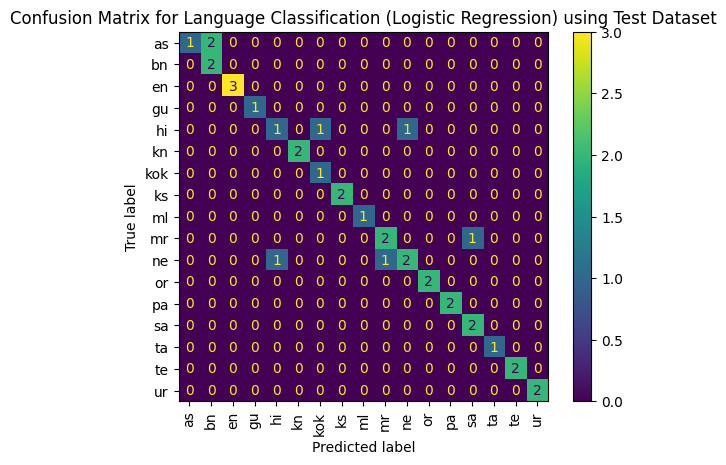

In [4]:
# feature domain of logistics regression using test dataset
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unicodedata
from nltk import pos_tag
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
dataset_path = 'test_dataset.csv'
data = pd.read_csv(dataset_path)
print("Columns in dataset:", data.columns)

# Ensure 'text' and 'language' columns exist in dataset
if 'text' not in data.columns or 'language' not in data.columns:
    raise KeyError("Please check that 'text' and 'language' columns are present in the dataset.")

data['text'] = data['text'].astype(str).fillna('')  # Ensure no missing or non-string values
labels = data['language']

# Define stopwords and vowels for multiple languages
stopword_sets = {
    'bn': set(stopwords.words('bengali') if 'bengali' in stopwords.fileids() else []),
    'en': set(stopwords.words('english') if 'english' in stopwords.fileids() else []),
    'gu': set(stopwords.words('gujarati') if 'gujarati' in stopwords.fileids() else []),
    'hi': set(stopwords.words('hindi') if 'hindi' in stopwords.fileids() else []),
    'kn': set(stopwords.words('kannada') if 'kannada' in stopwords.fileids() else []),
    'kok': set(['आहे', 'असे', 'आणि', 'पण', 'म्हणजे']),  # Example Konkani stopwords
    'ks': set(['کھ', 'ہے', 'اور', 'لیکن']),  # Example Kashmiri stopwords
    'ml': set(stopwords.words('malayalam') if 'malayalam' in stopwords.fileids() else []),
    'mr': set(stopwords.words('marathi') if 'marathi' in stopwords.fileids() else []),
    'ne': set(['छ', 'वा', 'र', 'तर', 'त', 'मा', 'देखि']),  # Example Nepali stopwords
    'or': set(stopwords.words('oriya') if 'oriya' in stopwords.fileids() else []),
    'pa': set(['ਤੇ', 'ਹੈ', 'ਅਤੇ', 'ਜੋ', 'ਨਹੀਂ']),  # Example Punjabi stopwords
    'sa': set(['च', 'त', 'हि', 'एव', 'वा']),  # Example Sanskrit stopwords
    'ta': set(stopwords.words('tamil') if 'tamil' in stopwords.fileids() else []),
    'te': set(stopwords.words('telugu') if 'telugu' in stopwords.fileids() else []),
    'ur': set(stopwords.words('urdu') if 'urdu' in stopwords.fileids() else []),
}

vowel_sets = {
    'bn': 'অআইঈউঊঋএঐওঔ',  # Bengali
    'en': 'aeiou',  # English
    'gu': 'અઆઇઈઉઊઋએઐઓઔ',  # Gujarati
    'hi': 'अआइईउऊऋएऐओऔ',  # Hindi
    'kn': 'ಅಆಇಈಉಊಋಎಏಐಒಔ',  # Kannada
    'kok': 'अआइईउऊऋएऐओऔ',  # Konkani (Devanagari)
    'ks': 'اےاؤ',  # Kashmiri (Arabic script example)
    'ml': 'അആഇഈഉഊഋഎഏഐഒഔ',  # Malayalam
    'mr': 'अआइईउऊऋएऐओऔ',  # Marathi
    'ne': 'अआइईउऊऋएऐओऔ',  # Nepali
    'or': 'ଅଆଇଈଉଊଋଏଐଓଔ',  # Odia
    'pa': 'ਅਆਇਈਉਊਏਐਓਔ',  # Punjabi
    'sa': 'अआइईउऊऋएऐओऔ',  # Sanskrit (Devanagari)
    'ta': 'அஆஇஈஉஊஎஏஐஒஓஔ',  # Tamil
    'te': 'అఆఇఈఉఊఎఏఐఒఓఔ',  # Telugu
    'ur': 'اےاؤ',  # Urdu
}

# Feature extraction functions
def average_word_length(text):
    words = word_tokenize(text)
    return np.mean([len(word) for word in words]) if words else 0

def average_sentence_length(text):
    sentences = re.split(r'[.!?]', text)
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return np.mean([len(sentence.split()) for sentence in sentences]) if sentences else 0

def calculate_stopword_count(text, language):
    words = word_tokenize(text)
    stopword_set = stopword_sets.get(language, set())
    return sum(1 for word in words if word.lower() in stopword_set)

def calculate_vowel_count(text, language):
    vowels = vowel_sets.get(language, '')
    return sum(1 for char in text if char in vowels)

def calculate_diacritic_frequency(text):
    return sum(1 for char in text if unicodedata.category(char) == 'Mn')

def character_trigram_count(text):
    return len([text[i:i+3] for i in range(len(text) - 2)])

def calculate_pos_ratios(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)
    pos_counts = pd.Series([tag for _, tag in tagged])
    noun_ratio = sum(pos_counts.str.startswith('NN')) / len(words) if len(words) else 0
    verb_ratio = sum(pos_counts.str.startswith('VB')) / len(words) if len(words) else 0
    return noun_ratio, verb_ratio

# Additional Feature Functions
def calculate_prefix_suffix_frequency(words):
    prefixes = [word[:3] for word in words if len(word) >= 3]
    suffixes = [word[-3:] for word in words if len(word) >= 3]
    return len(prefixes), len(suffixes)

def script_based_feature(text):
    if re.search('[\u0980-\u09FF]', text):  # Bengali
        return "bn"
    elif re.search('[\u0A80-\u0AFF]', text):  # Gujarati
        return "gu"
    elif re.search('[\u0900-\u097F]', text):  # Hindi
        return "hi"
    elif re.search('[\u0C80-\u0CFF]', text):  # Kannada
        return "kn"
    elif re.search('[\u0900-\u097F]', text) and re.search('[\u0900-\u091F]', text):  # Konkani
        return "kok"
    elif re.search('[\u0600-\u06FF]', text):  # Kashmiri
        return "ks"
    elif re.search('[\u0D00-\u0D7F]', text):  # Malayalam
        return "ml"
    elif re.search('[\u0900-\u097F]', text):  # Marathi
        return "mr"
    elif re.search('[\u0900-\u097F]', text):  # Nepali
        return "ne"
    elif re.search('[\u0B00-\u0B7F]', text):  # Odia
        return "or"
    elif re.search('[\u0A00-\u0A7F]', text):  # Punjabi
        return "pa"
    elif re.search('[\u0900-\u097F]', text):  # Sanskrit
        return "sa"
    elif re.search('[\u0B80-\u0BFF]', text):  # Tamil
        return "ta"
    elif re.search('[\u0C00-\u0C7F]', text):  # Telugu
        return "te"
    elif re.search('[\u0600-\u06FF]', text):  # Urdu
        return "ur"
    elif re.search('[\u0980-\u09FF]', text):  # Assamese
        return "as"
    elif re.search('[a-zA-Z]', text):  # English
        return "en"
    else:
        return "other"

# Update extract_features to include new features
def extract_features(row):
    text = row['text']
    language = row['language']
    words = word_tokenize(text)

    prefix_count, suffix_count = calculate_prefix_suffix_frequency(words)
    script_feature = script_based_feature(text)

    return {
        'avg_word_length': average_word_length(text),
        'avg_sentence_length': average_sentence_length(text),
        'stopword_count': calculate_stopword_count(text, language),
        'vowel_count': calculate_vowel_count(text, language),
        'diacritic_freq': calculate_diacritic_frequency(text),
        'trigram_count': character_trigram_count(text),
        'noun_ratio': calculate_pos_ratios(text)[0],
        'verb_ratio': calculate_pos_ratios(text)[1],
        'prefix_count': prefix_count,
        'suffix_count': suffix_count,
        'script_feature': script_feature,
    }

# Apply feature extraction
data['extracted_features'] = data.apply(extract_features, axis=1)
feature_df = pd.json_normalize(data['extracted_features'])

# Convert script_feature to numerical encoding (one-hot encoding or label encoding)
script_feature_encoded = pd.get_dummies(feature_df['script_feature'], prefix='script')
feature_df = pd.concat([feature_df.drop(columns=['script_feature']), script_feature_encoded], axis=1)

# TF-IDF Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text']).toarray()

# Combine all features
X = np.hstack((feature_df.to_numpy(), tfidf_matrix))
y = labels.values
# Scale the combined feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)

# Validation Results
y_val_pred = lr_model.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, y_val_pred))

# Test Results
y_test_pred = lr_model.predict(X_test)
print("Test Results:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Language Classification (Logistic Regression) using Test Dataset")
plt.show()


Validation Results:
              precision    recall  f1-score   support

          as       1.00      1.00      1.00         1
          bn       1.00      1.00      1.00         3
          en       1.00      1.00      1.00         3
          gu       1.00      1.00      1.00         5
          hi       1.00      0.50      0.67         2
          kn       1.00      1.00      1.00         3
         kok       1.00      1.00      1.00         2
          ks       0.25      1.00      0.40         1
          ml       1.00      1.00      1.00         1
          mr       0.50      1.00      0.67         1
          ne       0.50      0.50      0.50         2
          or       1.00      1.00      1.00         2
          sa       1.00      1.00      1.00         4
          ta       1.00      1.00      1.00         1
          te       1.00      1.00      1.00         1
          ur       1.00      0.25      0.40         4

    accuracy                           0.86        36
   mac

c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

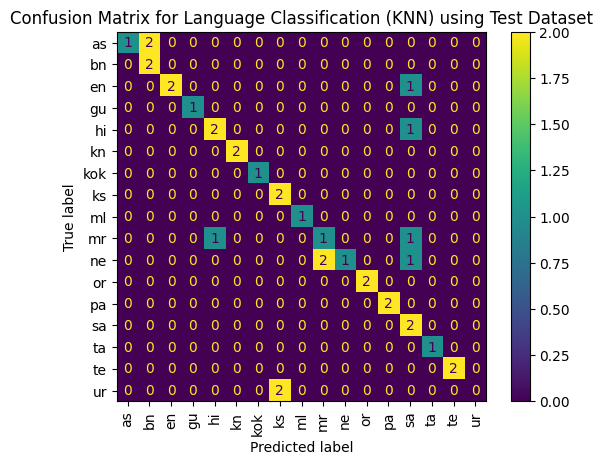

In [5]:
# feature domain using knn test dataset
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
import seaborn as sns

# Assume feature extraction functions and dataset preprocessing are the same as your original code.

# Combine all features (feature_df + TF-IDF matrix)
X = np.hstack((feature_df.to_numpy(), tfidf_matrix))
y = labels.values

# Scale features (important for KNN)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train KNN model
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Euclidean distance metric
knn_model.fit(X_train, y_train)

# Validation Results
y_val_pred = knn_model.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, y_val_pred))

# Test Results
y_test_pred = knn_model.predict(X_test)
print("Test Results:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Language Classification (KNN) using Test Dataset")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns in dataset: Index(['text', 'language', 'text_length', 'tokens'], dtype='object')
Validation Results:
              precision    recall  f1-score   support

          as       1.00      1.00      1.00         1
          bn       1.00      1.00      1.00         3
          en       1.00      1.00      1.00         3
          gu       1.00      1.00      1.00         5
          hi       1.00      0.50      0.67         2
          kn       1.00      1.00      1.00         3
         kok       0.50      0.50      0.50         2
          ks       1.00      1.00      1.00         1
          ml       1.00      1.00      1.00         1
          mr       0.33      1.00      0.50         1
          ne       0.00      0.00      0.00         2
          or       1.00      1.00      1.00         2
          sa       0.67      0.50      0.57         4
          ta       1.00      1.00      1.00         1
          te       1.00      1.00      1.00         1
          ur       1.00   

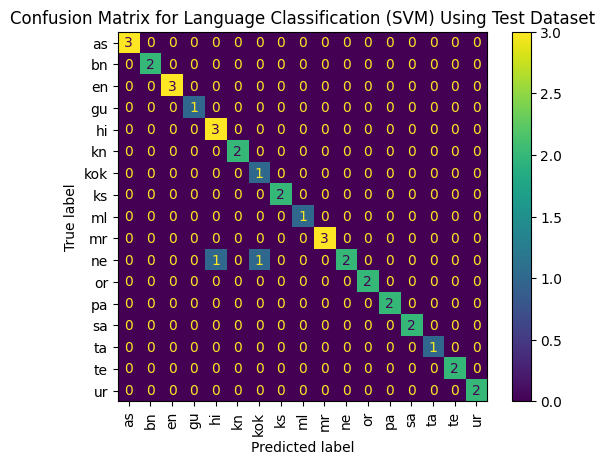

In [6]:
# feature domain using svm test dataset
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unicodedata
from nltk import pos_tag
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
dataset_path = 'test_dataset.csv'
data = pd.read_csv(dataset_path)
print("Columns in dataset:", data.columns)

# Ensure 'text' and 'language' columns exist in dataset
if 'text' not in data.columns or 'language' not in data.columns:
    raise KeyError("Please check that 'text' and 'language' columns are present in the dataset.")

data['text'] = data['text'].astype(str).fillna('')  # Ensure no missing or non-string values
labels = data['language']

# Define stopwords and vowels for multiple languages
stopword_sets = {
    'bn': set(stopwords.words('bengali') if 'bengali' in stopwords.fileids() else []),
    'en': set(stopwords.words('english') if 'english' in stopwords.fileids() else []),
    'gu': set(stopwords.words('gujarati') if 'gujarati' in stopwords.fileids() else []),
    'hi': set(stopwords.words('hindi') if 'hindi' in stopwords.fileids() else []),
    'kn': set(stopwords.words('kannada') if 'kannada' in stopwords.fileids() else []),
    'kok': set(['आहे', 'असे', 'आणि', 'पण', 'म्हणजे']),  # Example Konkani stopwords
    'ks': set(['کھ', 'ہے', 'اور', 'لیکن']),  # Example Kashmiri stopwords
    'ml': set(stopwords.words('malayalam') if 'malayalam' in stopwords.fileids() else []),
    'mr': set(stopwords.words('marathi') if 'marathi' in stopwords.fileids() else []),
    'ne': set(['छ', 'वा', 'र', 'तर', 'त', 'मा', 'देखि']),  # Example Nepali stopwords
    'or': set(stopwords.words('oriya') if 'oriya' in stopwords.fileids() else []),
    'pa': set(['ਤੇ', 'ਹੈ', 'ਅਤੇ', 'ਜੋ', 'ਨਹੀਂ']),  # Example Punjabi stopwords
    'sa': set(['च', 'त', 'हि', 'एव', 'वा']),  # Example Sanskrit stopwords
    'ta': set(stopwords.words('tamil') if 'tamil' in stopwords.fileids() else []),
    'te': set(stopwords.words('telugu') if 'telugu' in stopwords.fileids() else []),
    'ur': set(stopwords.words('urdu') if 'urdu' in stopwords.fileids() else []),
}

vowel_sets = {
    'bn': 'অআইঈউঊঋএঐওঔ',  # Bengali
    'en': 'aeiou',  # English
    'gu': 'અઆઇઈઉઊઋએઐઓઔ',  # Gujarati
    'hi': 'अआइईउऊऋएऐओऔ',  # Hindi
    'kn': 'ಅಆಇಈಉಊಋಎಏಐಒಔ',  # Kannada
    'kok': 'अआइईउऊऋएऐओऔ',  # Konkani (Devanagari)
    'ks': 'اےاؤ',  # Kashmiri (Arabic script example)
    'ml': 'അആഇഈഉഊഋഎഏഐഒഔ',  # Malayalam
    'mr': 'अआइईउऊऋएऐओऔ',  # Marathi
    'ne': 'अआइईउऊऋएऐओऔ',  # Nepali
    'or': 'ଅଆଇଈଉଊଋଏଐଓଔ',  # Odia
    'pa': 'ਅਆਇਈਉਊਏਐਓਔ',  # Punjabi
    'sa': 'अआइईउऊऋएऐओऔ',  # Sanskrit (Devanagari)
    'ta': 'அஆஇஈஉஊஎஏஐஒஓஔ',  # Tamil
    'te': 'అఆఇఈఉఊఎఏఐఒఓఔ',  # Telugu
    'ur': 'اےاؤ',  # Urdu
}

# Feature extraction functions
def average_word_length(text):
    words = word_tokenize(text)
    return np.mean([len(word) for word in words]) if words else 0

def average_sentence_length(text):
    sentences = re.split(r'[.!?]', text)
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return np.mean([len(sentence.split()) for sentence in sentences]) if sentences else 0

def calculate_stopword_count(text, language):
    words = word_tokenize(text)
    stopword_set = stopword_sets.get(language, set())
    return sum(1 for word in words if word.lower() in stopword_set)

def calculate_vowel_count(text, language):
    vowels = vowel_sets.get(language, '')
    return sum(1 for char in text if char in vowels)

def calculate_diacritic_frequency(text):
    return sum(1 for char in text if unicodedata.category(char) == 'Mn')

def character_trigram_count(text):
    return len([text[i:i+3] for i in range(len(text) - 2)])

def calculate_pos_ratios(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)
    pos_counts = pd.Series([tag for _, tag in tagged])
    noun_ratio = sum(pos_counts.str.startswith('NN')) / len(words) if len(words) else 0
    verb_ratio = sum(pos_counts.str.startswith('VB')) / len(words) if len(words) else 0
    return noun_ratio, verb_ratio

# Additional Feature Functions
def calculate_prefix_suffix_frequency(words):
    prefixes = [word[:3] for word in words if len(word) >= 3]
    suffixes = [word[-3:] for word in words if len(word) >= 3]
    return len(prefixes), len(suffixes)

def script_based_feature(text):
    if re.search('[\u0980-\u09FF]', text):  # Bengali
        return "bn"
    elif re.search('[\u0A80-\u0AFF]', text):  # Gujarati
        return "gu"
    elif re.search('[\u0900-\u097F]', text):  # Hindi
        return "hi"
    elif re.search('[\u0C80-\u0CFF]', text):  # Kannada
        return "kn"
    elif re.search('[\u0900-\u097F]', text) and re.search('[\u0900-\u091F]', text):  # Konkani
        return "kok"
    elif re.search('[\u0600-\u06FF]', text):  # Kashmiri
        return "ks"
    elif re.search('[\u0D00-\u0D7F]', text):  # Malayalam
        return "ml"
    elif re.search('[\u0900-\u097F]', text):  # Marathi
        return "mr"
    elif re.search('[\u0900-\u097F]', text):  # Nepali
        return "ne"
    elif re.search('[\u0B00-\u0B7F]', text):  # Odia
        return "or"
    elif re.search('[\u0A00-\u0A7F]', text):  # Punjabi
        return "pa"
    elif re.search('[\u0900-\u097F]', text):  # Sanskrit
        return "sa"
    elif re.search('[\u0B80-\u0BFF]', text):  # Tamil
        return "ta"
    elif re.search('[\u0C00-\u0C7F]', text):  # Telugu
        return "te"
    elif re.search('[\u0600-\u06FF]', text):  # Urdu
        return "ur"
    elif re.search('[\u0980-\u09FF]', text):  # Assamese
        return "as"
    elif re.search('[a-zA-Z]', text):  # English
        return "en"
    else:
        return "other"

# Update extract_features to include new features
def extract_features(row):
    text = row['text']
    language = row['language']
    words = word_tokenize(text)

    prefix_count, suffix_count = calculate_prefix_suffix_frequency(words)
    script_feature = script_based_feature(text)

    return {
        'avg_word_length': average_word_length(text),
        'avg_sentence_length': average_sentence_length(text),
        'stopword_count': calculate_stopword_count(text, language),
        'vowel_count': calculate_vowel_count(text, language),
        'diacritic_freq': calculate_diacritic_frequency(text),
        'trigram_count': character_trigram_count(text),
        'noun_ratio': calculate_pos_ratios(text)[0],
        'verb_ratio': calculate_pos_ratios(text)[1],
        'prefix_count': prefix_count,
        'suffix_count': suffix_count,
        'script_feature': script_feature,
    }
#  Apply feature extraction
data['extracted_features'] = data.apply(extract_features, axis=1)
feature_df = pd.json_normalize(data['extracted_features'])

# Convert script_feature to numerical encoding (one-hot encoding or label encoding)
script_feature_encoded = pd.get_dummies(feature_df['script_feature'], prefix='script')
feature_df = pd.concat([feature_df.drop(columns=['script_feature']), script_feature_encoded], axis=1)

# TF-IDF Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text']).toarray()

# Combine all features
X = np.hstack((feature_df.to_numpy(), tfidf_matrix))
y = labels.values

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', probability=True)  # Use 'linear' kernel, can be changed to 'rbf' or others
svm_model.fit(X_train, y_train)

# Validation Results
y_val_pred = svm_model.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, y_val_pred))

# Test Results
y_test_pred = svm_model.predict(X_test)
print("Test Results:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Language Classification (SVM) Using Test Dataset")
plt.show()


Naive Bayes - Validation Results:
              precision    recall  f1-score   support

          as       1.00      1.00      1.00         1
          bn       1.00      1.00      1.00         3
          en       1.00      1.00      1.00         3
          gu       1.00      0.60      0.75         5
          hi       1.00      1.00      1.00         2
          kn       0.60      1.00      0.75         3
         kok       0.29      1.00      0.44         2
          ks       1.00      1.00      1.00         1
          ml       1.00      1.00      1.00         1
          mr       0.00      0.00      0.00         1
          ne       0.00      0.00      0.00         2
          or       1.00      1.00      1.00         2
          sa       1.00      0.50      0.67         4
          ta       0.00      0.00      0.00         1
          te       1.00      1.00      1.00         1
          ur       0.80      1.00      0.89         4

    accuracy                           0.78   

c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

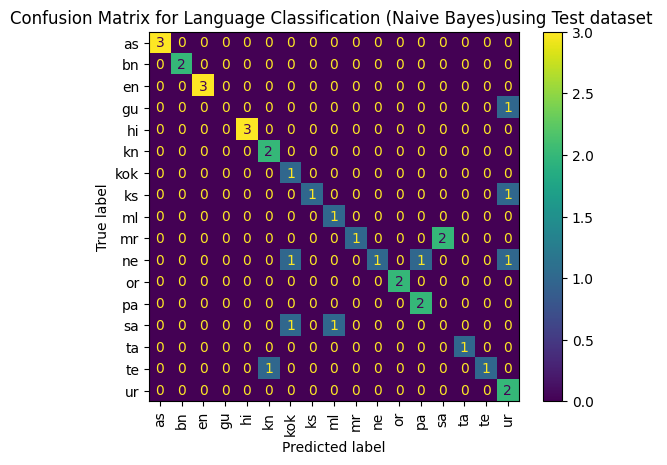

Random Forest - Validation Results:
              precision    recall  f1-score   support

          as       1.00      1.00      1.00         1
          bn       1.00      1.00      1.00         3
          en       1.00      1.00      1.00         3
          gu       1.00      1.00      1.00         5
          hi       1.00      0.50      0.67         2
          kn       1.00      1.00      1.00         3
         kok       1.00      0.50      0.67         2
          ks       1.00      1.00      1.00         1
          ml       1.00      1.00      1.00         1
          mr       0.00      0.00      0.00         1
          ne       0.00      0.00      0.00         2
          or       1.00      1.00      1.00         2
          sa       0.60      0.75      0.67         4
          ta       1.00      1.00      1.00         1
          te       1.00      1.00      1.00         1
          ur       1.00      1.00      1.00         4

    accuracy                           0.83 

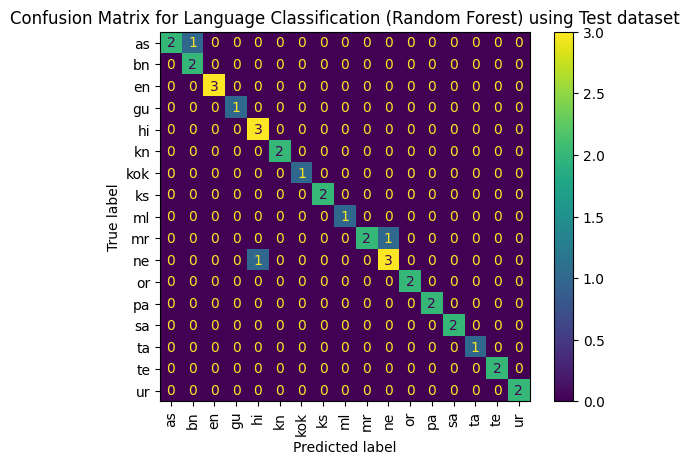

In [7]:
# feature domain using naive byes and random forest USING TEST DATASET
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Validation Results - Naive Bayes
y_val_pred_nb = nb_model.predict(X_val)
print("Naive Bayes - Validation Results:")
print(classification_report(y_val, y_val_pred_nb))

# Test Results - Naive Bayes
y_test_pred_nb = nb_model.predict(X_test)
print("Naive Bayes - Test Results:")
print(classification_report(y_test, y_test_pred_nb))

# Confusion Matrix - Naive Bayes
cm_nb = confusion_matrix(y_test, y_test_pred_nb, labels=np.unique(y_test))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=np.unique(y_test))
disp_nb.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Language Classification (Naive Bayes)using Test dataset ")
plt.show()

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validation Results - Random Forest
y_val_pred_rf = rf_model.predict(X_val)
print("Random Forest - Validation Results:")
print(classification_report(y_val, y_val_pred_rf))

# Test Results - Random Forest
y_test_pred_rf = rf_model.predict(X_test)
print("Random Forest - Test Results:")
print(classification_report(y_test, y_test_pred_rf))

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf, labels=np.unique(y_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(y_test))
disp_rf.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Language Classification (Random Forest) using Test dataset")
plt.show()



Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.6292
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

          as       1.00      0.50      0.67         6
          bn       0.70      1.00      0.82         7
          en       0.80      0.67      0.73         6
          gu       0.83      0.56      0.67         9
          hi       0.60      0.75      0.67         4
          kn       0.45      1.00      0.62         5
         kok       0.71      0.83      0.77         6
          ks       0.50      0.50      0.50         4
          ml       0.50      0.50      0.50         4
          mr       1.00      0.29      0.44         7
          ne       0.33      0.33      0.33         3
          or       0.33      0.67      0.44         3
          pa       1.00      1.00      1.00         3
          sa       0.43      0.38      0.40         8
          ta       0.50      0.40      0.44         5
          te       0.

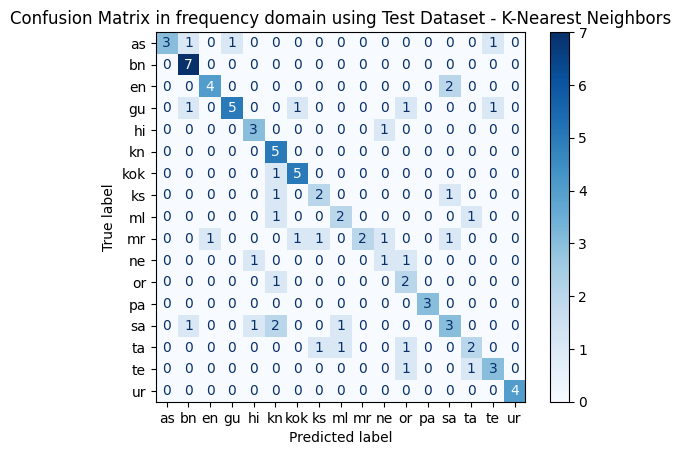


Training Support Vector Machine (SVM)...
Support Vector Machine (SVM) Accuracy: 0.6517
Support Vector Machine (SVM) Classification Report:
               precision    recall  f1-score   support

          as       1.00      0.67      0.80         6
          bn       0.88      1.00      0.93         7
          en       1.00      1.00      1.00         6
          gu       0.70      0.78      0.74         9
          hi       0.50      0.75      0.60         4
          kn       1.00      1.00      1.00         5
         kok       0.83      0.83      0.83         6
          ks       1.00      0.50      0.67         4
          ml       1.00      0.50      0.67         4
          mr       0.50      0.29      0.36         7
          ne       0.33      0.33      0.33         3
          or       1.00      0.67      0.80         3
          pa       1.00      1.00      1.00         3
          sa       0.00      0.00      0.00         8
          ta       0.18      0.80      0.30     

c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

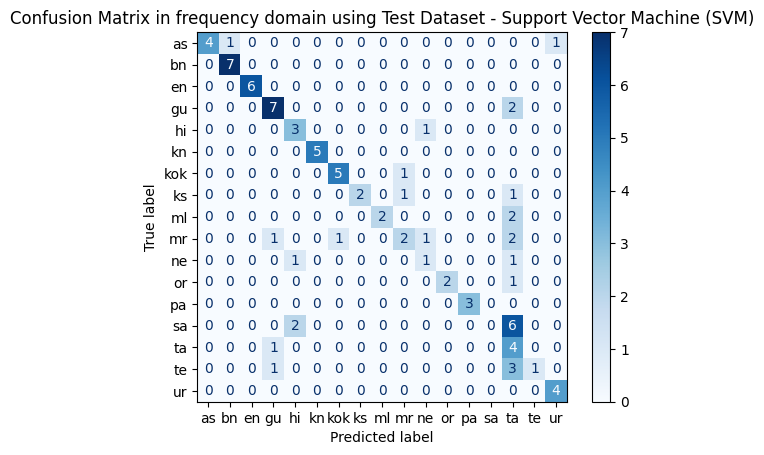


Training Logistic Regression...
Logistic Regression Accuracy: 0.7191
Logistic Regression Classification Report:
               precision    recall  f1-score   support

          as       1.00      1.00      1.00         6
          bn       1.00      1.00      1.00         7
          en       1.00      1.00      1.00         6
          gu       0.70      0.78      0.74         9
          hi       0.75      0.75      0.75         4
          kn       1.00      1.00      1.00         5
         kok       0.86      1.00      0.92         6
          ks       1.00      0.50      0.67         4
          ml       0.60      0.75      0.67         4
          mr       1.00      0.43      0.60         7
          ne       0.50      0.33      0.40         3
          or       1.00      0.67      0.80         3
          pa       1.00      1.00      1.00         3
          sa       1.00      0.25      0.40         8
          ta       0.15      0.60      0.24         5
          te       1.

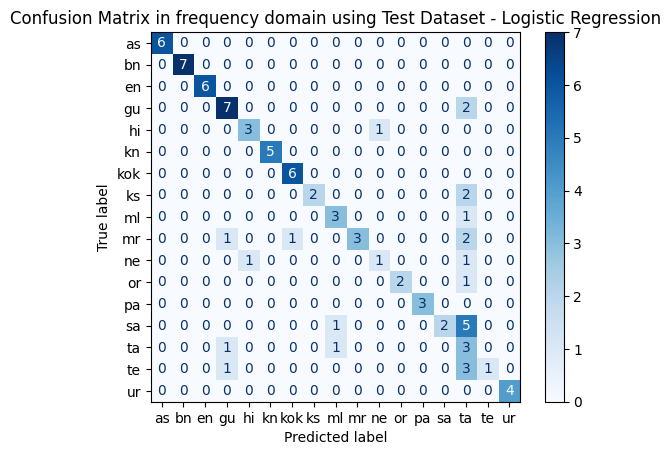


Training Naive Bayes...
Naive Bayes Accuracy: 0.6629
Naive Bayes Classification Report:
               precision    recall  f1-score   support

          as       0.75      1.00      0.86         6
          bn       1.00      1.00      1.00         7
          en       0.86      1.00      0.92         6
          gu       1.00      0.44      0.62         9
          hi       0.75      0.75      0.75         4
          kn       1.00      1.00      1.00         5
         kok       0.86      1.00      0.92         6
          ks       1.00      0.50      0.67         4
          ml       0.17      1.00      0.29         4
          mr       1.00      0.43      0.60         7
          ne       0.50      0.33      0.40         3
          or       0.50      0.67      0.57         3
          pa       1.00      1.00      1.00         3
          sa       1.00      0.25      0.40         8
          ta       0.00      0.00      0.00         5
          te       1.00      0.20      0.33  

c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

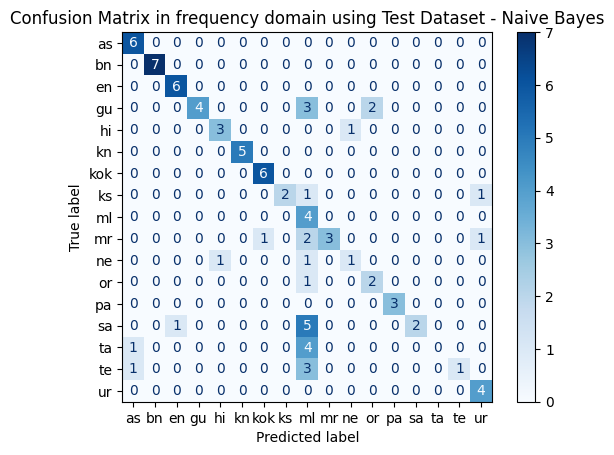

In [8]:
# frequency domain using Naive byes,knn,svm,logistics regression using test datset
from scipy.fft import fft
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Assuming numeric features and tfidf_matrix are available
numeric_features = ['avg_word_length', 'avg_sentence_length', 
                    'stopword_count', 'vowel_count', 
                    'diacritic_freq', 'trigram_count']

# Transform numeric features to frequency domain using FFT
def transform_to_frequency(features):
    return np.abs(fft(features, axis=0))

fft_features = {}
for feature in numeric_features:
    fft_features[f"{feature}_freq"] = transform_to_frequency(feature_df[feature].values.reshape(-1, 1))

# Combine original and FFT-transformed features
original_features = feature_df[numeric_features].values
fft_features_array = np.column_stack([fft_features[f"{f}_freq"] for f in numeric_features])
X = np.hstack((original_features, fft_features_array, tfidf_matrix))

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Oversample minority classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model training and evaluation function
def train_and_evaluate_model(model, model_name):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y)).plot(cmap='Blues')
    plt.title(f"Confusion Matrix in frequency domain using Test Dataset - {model_name}")
    plt.show()

# Initialize and train models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Naive Bayes": MultinomialNB()
}

for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)


Accuracy with Frequency Features: 0.7528089887640449
Best Parameters with Frequency Features: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report with Frequency Features:
               precision    recall  f1-score   support

          as       1.00      1.00      1.00         6
          bn       0.88      1.00      0.93         7
          en       1.00      1.00      1.00         6
          gu       0.86      0.67      0.75         9
          hi       0.80      1.00      0.89         4
          kn       1.00      0.80      0.89         5
         kok       0.80      0.67      0.73         6
          ks       0.67      0.50      0.57         4
          ml       0.33      0.25      0.29         4
          mr       0.67      0.57      0.62         7
          ne       0.33      0.67      0.44         3
          or       0.43      1.00      0.60         3
          pa       1.00      1.00      1.00         3
          sa   

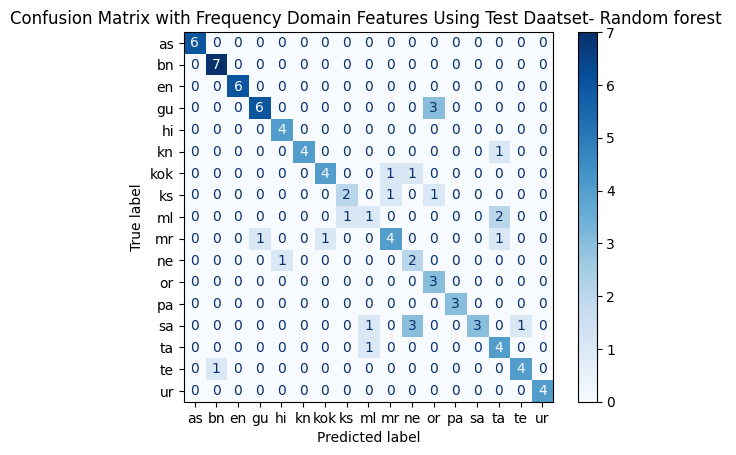

In [10]:
# frequency domain using random forest

from scipy.fft import fft
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming extracted numeric features are already calculated in `feature_df`
# Ensure the following numeric features exist in `feature_df`
numeric_features = ['avg_word_length', 'avg_sentence_length', 
                    'stopword_count', 'vowel_count', 
                    'diacritic_freq', 'trigram_count']

# Transform selected numeric features to frequency domain using FFT
def transform_to_frequency(features):
    return np.abs(fft(features, axis=0))  # Apply FFT and take magnitude

# Apply FFT to numeric features
fft_features = {}
for feature in numeric_features:
    fft_features[f"{feature}_freq"] = transform_to_frequency(feature_df[feature].values.reshape(-1, 1))

# Combine original and FFT-transformed features
original_features = feature_df[numeric_features].values
fft_features_array = np.column_stack([fft_features[f"{f}_freq"] for f in numeric_features])
X = np.hstack((original_features, fft_features_array, tfidf_matrix))

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Oversample minority classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model training and evaluation with Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model evaluation
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate results
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Frequency Features:", accuracy)
print("Best Parameters with Frequency Features:", grid.best_params_)
print("Classification Report with Frequency Features:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y)).plot(cmap='Blues')
plt.title("Confusion Matrix with Frequency Domain Features Using Test Daatset- Random forest ")
plt.show()
